# BRD Analysis

This paper is an analysis of the evolution of the Romanian candidate companies, based on the Morgan Stanley International Index (MSCI) criteria. The paper will offer a technical analysis on the evolution of Annual Traded Value Ratio (ATVR 12M) levels, Market Capitalization and Free Float Market Capitalization, (Mcap FF), of the Banca Transilvania, OMV Petrom, BRD Group Societe Generale and Romgaz, companies that in 2017 were the main Romanian candidates to meet MSCI criteria. The paper will take into consideration data from January to December 2018. Based on the updated evolution, the paper si revealing what are the challenges and opportunities that are likely to influence the important Romanian companies’ economic evolution, as well as what measures could be taken to enhance the companies’ evolution and eventually lead them to reaching the minimum ATVR and Market Free Float Capitalization requirements imposed by MSCI. In 2018 a study was made analyzing these companies and the paper addressed the chances of the Romanian Capital Market to be upgraded to Emerging Market status. The study showed that increasing liquidity is the most difficult factor to be achieved by Romanian companies listed on Bucharest Stock Exchange. Romania has the potential to be upgraded to the Emerging Market status if at least three companies met the minimum requirements, including the Annual Traded Value Ratio, requested by the MSCI. Following a technical analysis using the MSCI methodology, it was found that until first part of 2018 three companies met the ATVR target of at least 15%, such as Romgaz, Banca Transilvania, BRD Group Societe Generale. OMV-Petrom, reached only 12.62%. The company needed an increase of the total volume of the total stock market to bring the ATVR level to at least 15%. As recommendations, BRD Group Societe Generale needed to increase the Free Float market capitalization by 1.0534% that should reach the minimum required by MSCI USD, 763 mln until mid 2018. Another recommendation, by increasing offer through listing more companies on the Bucharest Stock Exchange and increasing demand by attracting as many retail investors as possible and improving financial literacy, trade volumes would consistently grow. Data was collected from Bucharest Stock Exchange, Trading Statistics section, and daily reports. This was computed the Annual Traded Value Ratios for 12 months (ATVR 12M) and ATVR for 3 months (ATVR 3M) for each company. The candidate companies included Romgaz, OMV-Petrom, Banca Transilvania, and BRD-Group Societe Generale. The methodology used is in accordance to the MSCI standard calculations.

# MSCI Methodology

In [1]:
#FF Market Cap == calculeaza folosind ultimul pret din luna respectiva in USD * Numarul de actiuni * 0.3 (FF) FAZA 1                    
#Median Traded Value == mediana valorilor tranzactionate dintr-o luna.FAZA 2                                                     
#Monthly Median Traded Value == Median Traded Value (USD) * numarul de zile tranzactionate din luna respective FAZA3               
#MTVR == Monthly Median Traded Value / FF Market Cap FAZA 4                                                      
#ATVR 12M = Average (MTVR i=1,12) *12 (Mai2017 – Aprilie2018) Faza 5

In [1]:

import pandas as pd
import seaborn as sns 
from pandas import DataFrame
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
from sklearn.preprocessing import LabelEncoder
import numpy as np
import plotly
import statistics
import plotly.express as px
import stats
import matplotlib.pyplot as plt 
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.cluster import KMeans
from sklearn.metrics import r2_score
import plotly.express as px
import datetime
import datetime as dt
import time

cmap = sns.diverging_palette(220, 15, as_cmap=True)


# Supress Scientific notation in python
pd.set_option('display.float_format', lambda x: '%.2f' % x)

# Display all columns of long dataframe
pd.set_option('display.max_columns', None)


# Load TLV data

In [2]:
#open file
tlv='TLV.csv'
tlv=pd.read_csv(tlv)
print(tlv.head(3))

   Unnamed: 0  Unnamed: 0.1        Date  Turnover_euro  Price_euro    Year  \
0           0             0  2019-01-01      921407.00        0.52 2019.00   
1           1             1  2019-01-02     3221195.00        0.52 2019.00   
2           2             2  2019-01-03     1419565.00        0.51 2019.00   

     Month  Day  MonthNumber  
0  January 1.00         1.00  
1  January 2.00         1.00  
2  January 3.00         1.00  


# Dates TLV

In [3]:
#parse index
tlv['Date']=pd.to_datetime(tlv['Date'], infer_datetime_format=True)
indexeddf=tlv.set_index(['Date'])
#print(indexeddf)

#parsing to time format and extracting dates 
x=tlv['Date']=pd.to_datetime(tlv['Date'], format='%d-%m-%y')

Day=tlv['Date'].dt.day_name()
Month=tlv['Date'].dt.month_name()
Year=tlv['Date'].dt.year

#subset
tlv['Year']=tlv['Date'].dt.year
tlv['Month']=tlv['Date'].dt.month
tlv['Day']=tlv['Date'].dt.day
print(tlv.head(3))

   Unnamed: 0  Unnamed: 0.1       Date  Turnover_euro  Price_euro    Year  \
0           0             0 2019-01-01      921407.00        0.52 2019.00   
1           1             1 2019-01-02     3221195.00        0.52 2019.00   
2           2             2 2019-01-03     1419565.00        0.51 2019.00   

   Month  Day  MonthNumber  
0   1.00 1.00         1.00  
1   1.00 2.00         1.00  
2   1.00 3.00         1.00  


In [4]:
c=tlv.to_csv('editedBRD.csv')

# FF & Issued securities

In [5]:
shares_out=4815093171
TLV_FreeFloat=0.7

# Number of Traded Days  TLV

In [6]:
Jan_days=20
Feb_days=20
March_days=22
April_days=19
May_days=21
June_days=20
Jul_days=22
Aug_days=22
Sep_days=20
Oct_days=23
Nov_days=21
Dec_days=18

# Last Price in Month for TLV

In [7]:
last_jan=0.569
last_feb=0.57
last_mar=0.623
last_apr=0.619
last_may=0.624
last_jun=0.574
last_jul=0.599
last_aug=0.557
last_sep=0.559
last_oct=0.556
last_nov=0.563
last_dec=0.48

# Median values TLV

In [8]:
median_tlv1=2332809
median_tlv2=1404528.75
median_tlv3=1861606.53
median_tlv4=1392774.37
median_tlv5=1772099.09
median_tlv6=1242596.49
median_tlv7=755224.46
median_tlv8=1678559.79
median_tlv9=1670928.14
median_tlv10=1555812.6
median_tlv11=1278841.23
median_tlv12=2825993.87

In [9]:
Median_TLV_Table=pd.DataFrame({'Month':[1,2,3,4,5,6,7,8,9,10,11,12],'Last_price_mo':[0.56,0.57,0.62,0.61,0.62,0.57,0.59,0.55,0.55,0.55,0.56,0.48], 'Median_TLV':[2332809,1404528.75,1861606.53,1392774.37,1772099.09,1242596.49,755224.46,1678559.79,1670928.14,1555812.6,1278841.23,2825993.87]})

Text(0.5, 41.09375, 'Values')

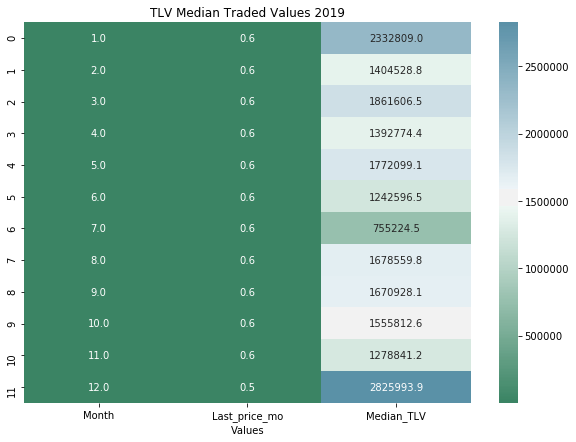

In [10]:
cmap1=sns.diverging_palette(150,227, as_cmap=True)
# Set the width and height of the figure
plt.figure(figsize=(10,7))

# Add title
plt.title("TLV Median Traded Values 2019")

# Heatmap showing average arrival delay for each airline by month
sns.heatmap(data=Median_TLV_Table, fmt='.1f',cmap=sns.diverging_palette(150,227, as_cmap=True),center=1530000,annot=True)

# Add label for horizontal axis
plt.xlabel("Values")

# FF Mcap TLV

In [11]:
FF_Mkt_Cap=round(last_jan*shares_out*TLV_FreeFloat)
FF_Mkt_Cap_2=round(last_feb*shares_out*TLV_FreeFloat)
FF_Mkt_Cap_3=round(last_mar*shares_out*TLV_FreeFloat)
FF_Mkt_Cap_4=round(last_apr*shares_out*TLV_FreeFloat)
FF_Mkt_Cap_5=round(last_may*shares_out*TLV_FreeFloat)
FF_Mkt_Cap_6=round(last_jun*shares_out*TLV_FreeFloat)
FF_Mkt_Cap_7=round(last_jul*shares_out*TLV_FreeFloat)
FF_Mkt_Cap_8=round(last_aug*shares_out*TLV_FreeFloat)
FF_Mkt_Cap_9=round(last_sep*shares_out*TLV_FreeFloat)
FF_Mkt_Cap_10=round(last_oct*shares_out*TLV_FreeFloat)
FF_Mkt_Cap_11=round(last_nov*shares_out*TLV_FreeFloat)
FF_Mkt_Cap_12=round(last_dec*shares_out*TLV_FreeFloat)

In [12]:
TLV_Table=pd.DataFrame({'Median_TLV':[2332809,1404528.75,1861606.53,1392774.37,1772099.09,1242596.49,755224.46,1678559.79,1670928.14,1555812.6,1278841.23,2825993.87],'FF_Mcap_TLV':[1917851610,1921222175,2099862132,2086379871,2103232697,1934704436,2018968567,1877404827,1884145958,1874034262,1897628219,1617871305]})

Text(0.5, 41.09375, 'Values')

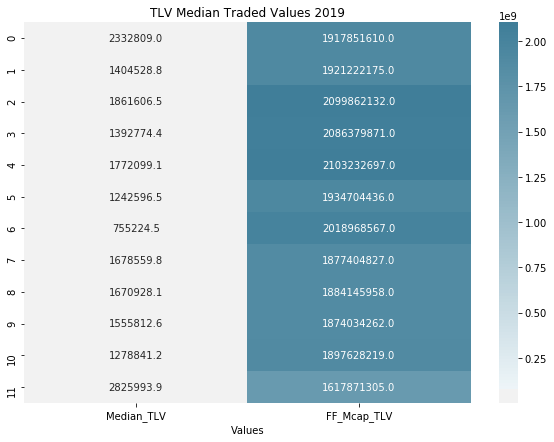

In [13]:
cmap1=sns.diverging_palette(150,227, as_cmap=True)
# Set the width and height of the figure
plt.figure(figsize=(10,7))

# Add title
plt.title("TLV Median Traded Values 2019")

# Heatmap showing average arrival delay for each airline by month
sns.heatmap(data=TLV_Table, fmt='.1f',cmap=sns.diverging_palette(150,227, as_cmap=True),center=2,annot=True)

# Add label for horizontal axis
plt.xlabel("Values")

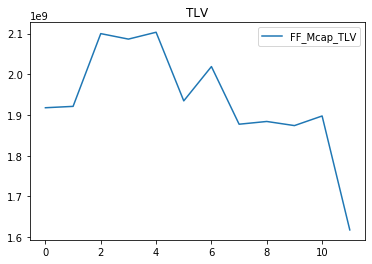

In [14]:
def stock_graph(symbol,title):
    df = TLV_Table
    #pd.read_csv("../input/pixiestock/pxi.csv".format(symbol)
    df[['FF_Mcap_TLV']].plot()
    plt.title(title)
    plt.show()

stock_graph("Values","TLV")

# MTVR Calculations

In [15]:
Jan_days=20
Feb_days=20
March_days=22
April_days=19
May_days=21
June_days=20
Jul_days=22
Aug_days=22
Sep_days=20
Oct_days=23
Nov_days=21
Dec_days=18

TLV_monthly_median_traded_value=round(median_tlv1*Jan_days) 
TLV_monthly_median_traded_value2=round(median_tlv2*Feb_days)
TLV_monthly_median_traded_value3=round(median_tlv3*March_days)
TLV_monthly_median_traded_value4=round(median_tlv4*April_days)
TLV_monthly_median_traded_value5=round(median_tlv5*May_days)
TLV_monthly_median_traded_value6=round(median_tlv6*June_days)
TLV_monthly_median_traded_value7=round(median_tlv7*Jul_days)
TLV_monthly_median_traded_value8=round(median_tlv8*Aug_days)
TLV_monthly_median_traded_value9=round(median_tlv9*Sep_days)
TLV_monthly_median_traded_value10=round(median_tlv10*Oct_days)
TLV_monthly_median_traded_value11=round(median_tlv11*Nov_days)
TLV_monthly_median_traded_value12=round(median_tlv12*Dec_days)

In [16]:
print(TLV_monthly_median_traded_value)
print(TLV_monthly_median_traded_value2)
print(TLV_monthly_median_traded_value3)
print(TLV_monthly_median_traded_value4)
print(TLV_monthly_median_traded_value5)
print(TLV_monthly_median_traded_value6)
print(TLV_monthly_median_traded_value7)
print(TLV_monthly_median_traded_value8)
print(TLV_monthly_median_traded_value9)
print(TLV_monthly_median_traded_value10)
print(TLV_monthly_median_traded_value11)
print(TLV_monthly_median_traded_value12)

46656180
28090575
40955344
26462713
37214081
24851930
16614938
36928315
33418563
35783690
26855666
50867890


# mtvr %

In [17]:
mtvr=(TLV_monthly_median_traded_value/FF_Mkt_Cap)
mtvr2=TLV_monthly_median_traded_value2/FF_Mkt_Cap
mtvr3=TLV_monthly_median_traded_value3/FF_Mkt_Cap
mtvr4=TLV_monthly_median_traded_value4/FF_Mkt_Cap
mtvr5=TLV_monthly_median_traded_value5/FF_Mkt_Cap
mtvr6=TLV_monthly_median_traded_value6/FF_Mkt_Cap
mtvr7=TLV_monthly_median_traded_value7/FF_Mkt_Cap
mtvr8=TLV_monthly_median_traded_value8/FF_Mkt_Cap
mtvr9=TLV_monthly_median_traded_value9/FF_Mkt_Cap
mtvr10=TLV_monthly_median_traded_value10/FF_Mkt_Cap
mtvr11=TLV_monthly_median_traded_value11/FF_Mkt_Cap
mtvr12=TLV_monthly_median_traded_value12/FF_Mkt_Cap

In [20]:
print(mtvr)
print(mtvr2)
print(mtvr3)
print(mtvr4)
print(mtvr5)
print(mtvr6)
print(mtvr7)
print(mtvr8)
print(mtvr9)
print(mtvr10)
print(mtvr11)
print(mtvr12)




0.024327314875002243
0.014646897003673814
0.021354803357283726
0.013798102450689603
0.01940404607215675
0.012958213174793018
0.008663307376528468
0.019255042886242905
0.017424999319942173
0.018658216211002894
0.014002994736386304
0.026523371117330604


# Average mtvr

`12 month average`

In [23]:
Average_mtvr=(mtvr+mtvr2+mtvr3+mtvr4+mtvr5+mtvr6+mtvr7+mtvr8+mtvr9+mtvr10+mtvr11+mtvr12)/12
#print(Average_mtvr)
#atvr=Average_mtvr/12
print(Average_mtvr)

0.017584775715086043


`average for 3 months`

In [18]:
Average_mtvr3=mtvr+mtvr2+mtvr3
#print(Average_mtvr)
atvr3m=Average_mtvr3/3
print(atvr3m)

0.020109671745319926


# Final ATVR 12M for TLV

In [19]:
TLV_ATVR12M=atvr*12
print(TLV_ATVR12M)

0.21101730858103251


# Final ATVR3M TLV

In [20]:
TLV_ATVR3M=atvr3m*12
print(TLV_ATVR3M)

0.24131606094383912


Text(0.5, -12.90625, 'Values')

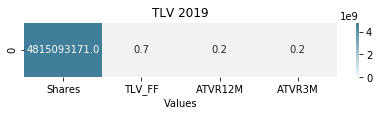

In [21]:
TLV=pd.DataFrame({'Shares':[4815093171],'TLV_FF':[0.7],'ATVR12M':[0.211], 'ATVR3M':[0.241]})

cmap1=sns.diverging_palette(150,227, as_cmap=True)
# Set the width and height of the figure
plt.figure(figsize=(7,1))

# Add title
plt.title("TLV 2019")

sns.heatmap(data=TLV, fmt = '.1f',cmap=sns.diverging_palette(150,227, as_cmap=True),center=1.3,annot=True)

# Add label for horizontal axis
plt.xlabel("Values")

# BRD 

In [22]:
#open file
brd='BRD.csv'
df=pd.read_csv(brd)
print(df.head(3))

   Euro_value      Date   Turnover_ron    Turnover_euro   Max_ron  Max_euro
0        4.23  1/1/2019     12188487.90       2881439.22    13.12      3.10
1         nan  1/2/2019     12188487.90       2881439.22    13.12      3.10
2         nan  1/3/2019       902942.50        213461.58    13.36      3.16


# Load data

# Remove euro col

In 2019 euro was 4.23.

In [23]:
df=df.drop('Euro_value', axis='columns')
print(df.head(3))

       Date   Turnover_ron    Turnover_euro   Max_ron  Max_euro
0  1/1/2019     12188487.90       2881439.22    13.12      3.10
1  1/2/2019     12188487.90       2881439.22    13.12      3.10
2  1/3/2019       902942.50        213461.58    13.36      3.16


# Parse date time series

In [24]:
#parse index
df['Date']=pd.to_datetime(df['Date'], infer_datetime_format=True)
indexeddf=df.set_index(['Date'])
#print(indexeddf)

#parsing to time format and extracting dates 
x=df['Date']=pd.to_datetime(df['Date'], format='%d-%m-%y')

Day=df['Date'].dt.day_name()
Month=df['Date'].dt.month_name()
Year=df['Date'].dt.year

#subset
df['Year']=df['Date'].dt.year
df['Month']=df['Date'].dt.month
df['Day']=df['Date'].dt.day
#print(df)


# passing the variables

In [25]:
shares_out=696901518
BRD_FreeFloat=0.3

# Passing Number of days for each month

In [26]:
Jan_days=19
Feb_days=20
March_days=22
April_days=19
May_days=21
June_days=20
Jul_days=22
Aug_days=22
Sep_days=21
Oct_days=23
Nov_days=21
Dec_days=19

# Last prices in month

In [27]:
#last prices in months

last_jan=3.21
last_feb=3.33
last_mar=3.57
last_apr=3.66
last_may=2.96
last_jun=3.10
last_jul=3.38
last_aug=3.36
last_sep=3.22
last_oct=3.12
last_nov=3.32
last_dec=2.72

# Tables

In [28]:
Table=pd.DataFrame({'Month':[1,2,3,4,5,6,7,8,9,10,11,12],'Last_price_mo':[3.21,3.33,3.57,3.66,2.96,3.1,3.38,3.36,
3.22,3.12,3.32,2.72],'No_days':[19,20,22,19,21,20,22,22,21,23,21,19]})

Text(0.5, 41.09375, 'Values')

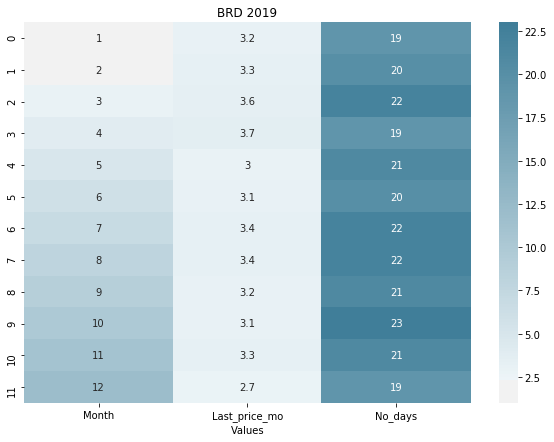

In [29]:
cmap1=sns.diverging_palette(150,227, as_cmap=True)
# Set the width and height of the figure
plt.figure(figsize=(10,7))

# Add title
plt.title("BRD 2019")

# Heatmap showing average arrival delay for each airline by month
sns.heatmap(data=Table, cmap=sns.diverging_palette(150,227, as_cmap=True),center=1.5,annot=True)

# Add label for horizontal axis
plt.xlabel("Values")

# FF Market Cap for each month

In [30]:
FF_Mkt_Cap=round(last_jan*shares_out*BRD_FreeFloat)
FF_Mkt_Cap_2=round(last_feb*shares_out*BRD_FreeFloat)
FF_Mkt_Cap_3=round(last_mar*shares_out*BRD_FreeFloat)
FF_Mkt_Cap_4=round(last_apr*shares_out*BRD_FreeFloat)
FF_Mkt_Cap_5=round(last_may*shares_out*BRD_FreeFloat)
FF_Mkt_Cap_6=round(last_jun*shares_out*BRD_FreeFloat)
FF_Mkt_Cap_7=round(last_jul*shares_out*BRD_FreeFloat)
FF_Mkt_Cap_8=round(last_aug*shares_out*BRD_FreeFloat)
FF_Mkt_Cap_9=round(last_sep*shares_out*BRD_FreeFloat)
FF_Mkt_Cap_10=round(last_oct*shares_out*BRD_FreeFloat)
FF_Mkt_Cap_11=round(last_nov*shares_out*BRD_FreeFloat)
FF_Mkt_Cap_12=round(last_dec*shares_out*BRD_FreeFloat)

# Median_traded_value for each month

In [31]:
Median_traded_value=1167801
Median_traded_value2=1120879
Median_traded_value3=1012924
Median_traded_value4=889211
Median_traded_value5=787451
Median_traded_value6=1066475
Median_traded_value7=589997
Median_traded_value8=500793
Median_traded_value9=1162866
Median_traded_value10=404043
Median_traded_value11=385335
Median_traded_value12=116288

# Monthly median traded value 

In [32]:
monthly_median_traded_value=round(Median_traded_value*Jan_days) 
monthly_median_traded_value2=round(Median_traded_value2*Feb_days)
monthly_median_traded_value3=round(Median_traded_value3*March_days)
monthly_median_traded_value4=round(Median_traded_value4*April_days)
monthly_median_traded_value5=round(Median_traded_value5*May_days)
monthly_median_traded_value6=round(Median_traded_value6*June_days)
monthly_median_traded_value7=round(Median_traded_value7*Jul_days)
monthly_median_traded_value8=round(Median_traded_value8*Aug_days)
monthly_median_traded_value9=round(Median_traded_value9*Sep_days)
monthly_median_traded_value10=round(Median_traded_value10*Oct_days)
monthly_median_traded_value11=round(Median_traded_value11*Nov_days)
monthly_median_traded_value12=round(Median_traded_value12*Dec_days)


# MTVR AS % for 12 months

In [33]:
mtvr=(monthly_median_traded_value/FF_Mkt_Cap)
mtvr2=monthly_median_traded_value2/FF_Mkt_Cap
mtvr3=monthly_median_traded_value3/FF_Mkt_Cap
mtvr4=monthly_median_traded_value4/FF_Mkt_Cap
mtvr5=monthly_median_traded_value5/FF_Mkt_Cap
mtvr6=monthly_median_traded_value6/FF_Mkt_Cap
mtvr7=monthly_median_traded_value7/FF_Mkt_Cap
mtvr8=monthly_median_traded_value8/FF_Mkt_Cap
mtvr9=monthly_median_traded_value9/FF_Mkt_Cap
mtvr10=monthly_median_traded_value10/FF_Mkt_Cap
mtvr11=monthly_median_traded_value11/FF_Mkt_Cap
mtvr12=monthly_median_traded_value12/FF_Mkt_Cap

# Average MTVRs 

In [34]:
Average_mtvr=mtvr+mtvr2+mtvr3+mtvr4+mtvr5+mtvr6+mtvr7+mtvr8+mtvr9+mtvr10+mtvr11+mtvr12
#print(Average_mtvr)
atvr=Average_mtvr/12

# ATVR12M

In [35]:
BRD_ATVR12M=atvr*12

In [36]:
Average_mtvr=mtvr+mtvr2+mtvr3
#print(Average_mtvr)
atvr3=Average_mtvr/3

In [37]:
ATVR3M=atvr3*12

In [38]:
ATVR3M

0.39867987563083007

In [39]:
s=pd.DataFrame({'Stock':['BRD','TLV'],'Shares':[696901518,4815093171],'FF':[0.3,0.7],'ATVR12M':[0.282,0.211], 'ATVR3M':[0.398,0.246]})

# Creating tables 

In [40]:
mtvr_vals=pd.DataFrame({'Month':[1,2,3,4,5,6,7,8,9,10,11,12],'MTVR':[0.033,0.033,0.033,0.025,0.024,0.031,0.019,0.01,0.036,0.013,0.012,0.003],'FF_MCap':[671116162,696204616,746381526,765197867,618848548,648118412,706658139,702476730,673206866,652299821,694113912,568671639]})

In [41]:
mtvr_vals

,Month,MTVR,FF_MCap
0,1,0.03,671116162
1,2,0.03,696204616
2,3,0.03,746381526
3,4,0.03,765197867
4,5,0.02,618848548
5,6,0.03,648118412
6,7,0.02,706658139
7,8,0.01,702476730
8,9,0.04,673206866
9,10,0.01,652299821


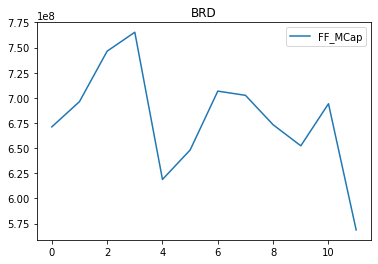

In [59]:
def stock_graph(symbol,title):
    df = mtvr_vals
    #pd.read_csv("../input/pixiestock/pxi.csv".format(symbol)
    df[['FF_MCap']].plot()
    plt.title(title)
    plt.show()

stock_graph("BRD","BRD")

# Median traded values for all months

Text(0.5, 41.09375, 'Values')

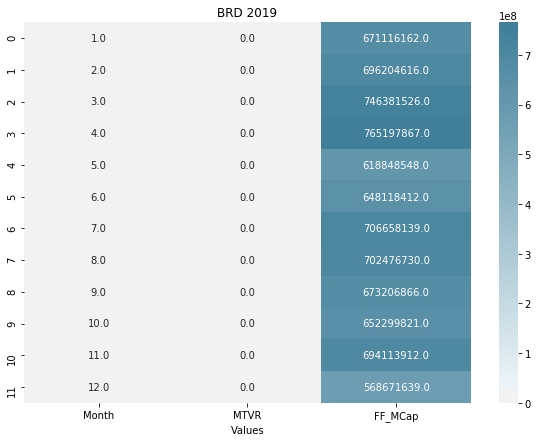

In [42]:
cmap1=sns.diverging_palette(150,227, as_cmap=True)
# Set the width and height of the figure
plt.figure(figsize=(10,7))

# Add title
plt.title("BRD 2019")

# Heatmap showing average arrival delay for each airline by month
sns.heatmap(data=mtvr_vals, fmt = '.1f',cmap=sns.diverging_palette(150,227, as_cmap=True),center=1.3,annot=True)

# Add label for horizontal axis
plt.xlabel("Values")

# ATVR Overview of company

In [43]:
s=pd.DataFrame({"Stock":['BRD','TLV'],'Shares':[696901518,4815093171],'FF':[0.3,0.7],'ATVR12M':[0.282,0.211], 'ATVR3M':[0.398,0.246]})

In [44]:
s

,Stock,Shares,FF,ATVR12M,ATVR3M
0,BRD,696901518,0.30,0.28,0.40
1,TLV,4815093171,0.70,0.21,0.25


In [45]:
s=pd.DataFrame({'Shares':[696901518,4815093171],'FF':[0.3,0.7],'ATVR12M':[0.282,0.211], 'ATVR3M':[0.398,0.246]})

Text(0.5, 6.0, 'Values')

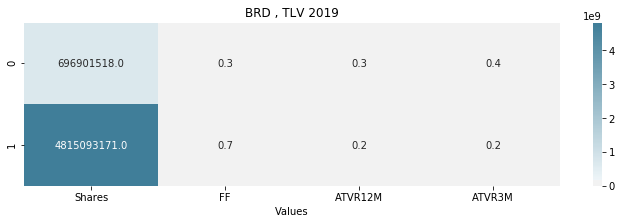

In [46]:
cmap1=sns.diverging_palette(150,227, as_cmap=True)
# Set the width and height of the figure
plt.figure(figsize=(12,3))

# Add title
plt.title("BRD , TLV 2019")

sns.heatmap(data=s, fmt = '.1f',cmap=sns.diverging_palette(150,227, as_cmap=True),center=2.3,annot=True)

# Add label for horizontal axis
plt.xlabel("Values")

In [47]:
AT=pd.DataFrame({'Shares':[696901518],'BRD_FF':[0.3],'ATVR12M':[0.2826], 'ATVR3M':[39.86]})

Text(0.5, -12.90625, 'Values')

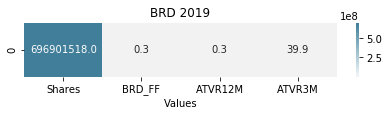

In [48]:
AT=pd.DataFrame({'Shares':[696901518],'BRD_FF':[0.3],'ATVR12M':[0.2826], 'ATVR3M':[39.86]})

cmap1=sns.diverging_palette(150,227, as_cmap=True)
# Set the width and height of the figure
plt.figure(figsize=(7,1))

# Add title
plt.title("BRD 2019")

# Heatmap showing average arrival delay for each airline by month
sns.heatmap(data=AT, fmt = '.1f',cmap=sns.diverging_palette(150,227, as_cmap=True),center=1.3,annot=True)

# Add label for horizontal axis
plt.xlabel("Values")

# Heatmaping on a certain month 

In [49]:
heat=df.copy()

In [50]:
heat=heat.drop('Date', axis='columns')

# Heatmaps for months

In [51]:
July=heat[heat.Month==7]

In [52]:
March=heat[heat.Month==3]
April=heat[heat.Month==4]

In [53]:
July=July.drop('Year', axis='columns')

Text(0.5, 41.09375, 'Values')

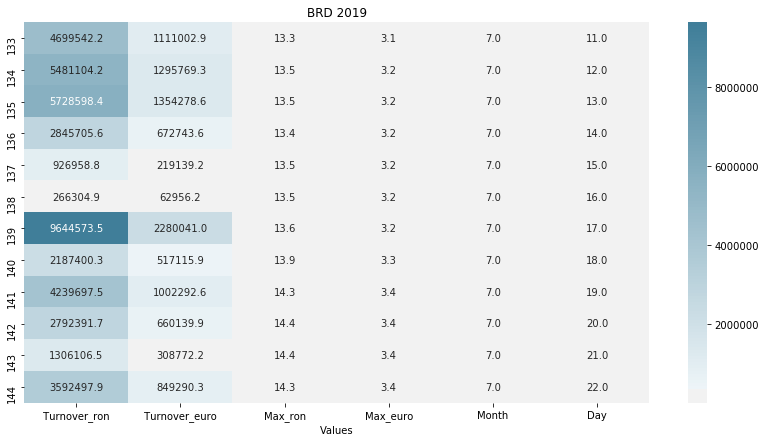

In [54]:
cmap1=sns.diverging_palette(150,227, as_cmap=True)
# Set the width and height of the figure
plt.figure(figsize=(14,7))

# Add title
plt.title("BRD 2019")

# Heatmap showing average arrival delay for each airline by month
sns.heatmap(data=July[10:26], fmt = '.1f',cmap=sns.diverging_palette(150,227, as_cmap=True),center=0,annot=True)

# Add label for horizontal axis
plt.xlabel("Values")

# March

Text(0.5, 41.09375, 'Values')

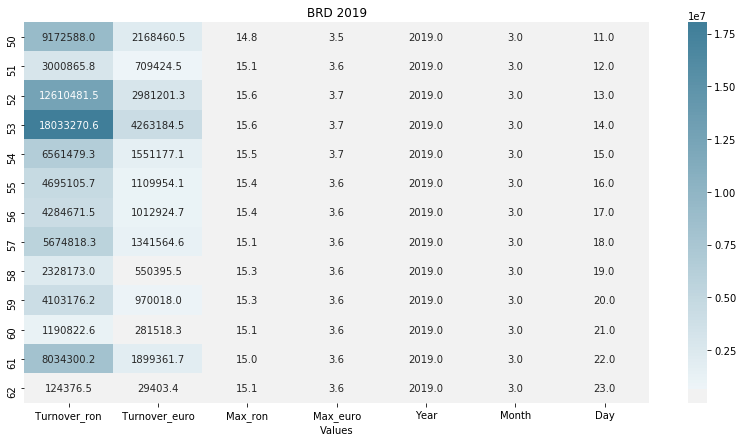

In [55]:
cmap1=sns.diverging_palette(150,227, as_cmap=True)
# Set the width and height of the figure
plt.figure(figsize=(14,7))

# Add title
plt.title("BRD 2019")

# Heatmap showing average arrival delay for each airline by month
sns.heatmap(data=March[10:26], fmt = '.1f',cmap=sns.diverging_palette(150,227, as_cmap=True),center=1.00,annot=True)

# Add label for horizontal axis
plt.xlabel("Values")

# April

Text(0.5, 41.09375, 'Values')

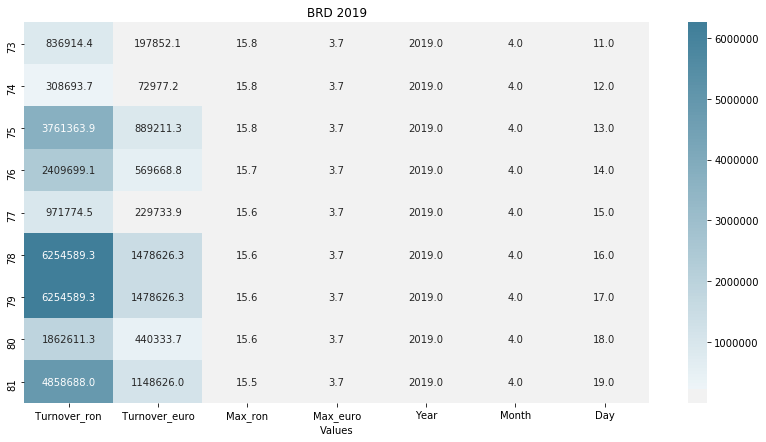

In [56]:
#usually April is the time of closing the financial year, depending on the company
cmap1=sns.diverging_palette(150,227, as_cmap=True)
# Set the width and height of the figure
plt.figure(figsize=(14,7))

# Add title
plt.title("BRD 2019")

# Heatmap showing average arrival delay for each airline by month
sns.heatmap(data=April[10:26], fmt = '.1f',cmap=sns.diverging_palette(150,227, as_cmap=True),center=1.00,annot=True)

# Add label for horizontal axis
plt.xlabel("Values")


In [ ]:
def stock_graph(symbol,title):
    df = pd.read_csv("../input/pixiestock/pxi.csv".format(symbol))
    df[['Electrica_Price']].plot()
    plt.title(title)
    plt.show()

stock_graph("EL","EL")